# **Lecture5 homework: wind turbulence statistics**

Name: 裴若鹏

Stuent ID: 24S154100

## **Question**

There are two sets of spatial (vertical z and transverse y) wind velocity time history records, with a duration of 10 minutes and a sampling frequency of 100 Hz (i.e., a time interval of 0.01 s). The data are stored in the windData folder.

### 1 Measurement point coordinates

(1) Z-direction measurement point coordinates
| Num. | 1 | 2 | 3 | 4 | 5 |
| --- | --- | --- | --- | --- | --- |
| x(m) | 0 | 0 | 0 | 0 | 0 |
| y(m) | 0 | 0 | 0 | 0 | 0 |
| z(m) | 10 | 30 | 50 | 70 | 90 |

(2) Y-direction measurement point coordinates
| Num. | 1 | 2 | 3 | 4 | 5 |
| --- | --- | --- | --- | --- | --- |
| x(m) | 0 | 0 | 0 | 0 | 0 |
| y(m) | 0 | 20 | 40 | 60 | 80 |
| z(m) | 50 | 50 | 50 | 50 | 50 |

### 2 Target turbulence characteristics
(1) Mean velocity profile
\begin{gather}
U_{avg}(z) = U_r \left(\frac{z}{z_r}\right)^\alpha \\
U_r=50\, \text{m/s},\ z_r=160\, \text{m},\ \alpha=0.22
\end{gather}

(2) Turbulence intensity profiles
\begin{gather}
I_u(z)=I_{10}\left ( \frac{z}{10}  \right )^{-\alpha}, \ I_v(z)=0.78I_u(z), \ I_w(z)=0.55I_u(z) \\
I_{10}=0.23,\alpha=0.22
\end{gather}

(3) Turbulence integral scale profiles
\begin{gather}
L_u^x(z)=100\left ( \frac{z}{30}  \right )^{0.5}, \ L_v^x(z)=0.5L_u^x(z), \ L_w^x(z)=0.5L_u^x(z) \\
\end{gather}

(4) Von Kármán wind spectra
\begin{gather}
S_u(f)=\frac{4(I_u U_{avg})^2(L_u^x/U_{avg})}{\left [ 1+70.8(fL_u^x/U_{avg})^2 \right ]^{5/6}} \\
S_v(f)=\frac{4(I_v U_{avg})^2(L_v^x/U_{avg})(1+188.4(2fL_v^x/U_{avg})^2)}{\left [ 1+70.8(2fL_v^x/U_{avg})^2 \right ]^{11/6}}  \\
S_w(f)=\frac{4(I_w U_{avg})^2(L_w^x/U_{avg})(1+188.4(2fL_w^x/U_{avg})^2)}{\left [ 1+70.8(2fL_w^x/U_{avg})^2 \right ]^{11/6}} 
\end{gather}

(5) Spatial correlation coefficient in the y-direction proposed by Shiotani  
\begin{gather}
\rho_u^y(r)=e^{-\left | r \right | /L_u^y} \\
\rho_v^y(r)=e^{-\left | r \right | /L_v^y} \\
\rho_w^y(r)=e^{-\left | r \right | /L_w^y} \\
L_u^y=60m,\ L_v^y=50m,\ L_w^y=40m
\end{gather}

### 3 Assignment requirements
Read the wind data in the `windData` folder according to the requirements below, calculate the turbulence characteristics, and plot them (the given target turbulence characteristics should be plotted together).

#### **For the z-direction wind velocity time history, calculate:**

(1) Mean velocity profile (calculate the U-component of velocity)

(2) Turbulence intensity profiles (calculate the fluctuating velocity components u, v, and w)

(3) Wind power spectral density (select one point and calculate the fluctuating velocity components u, v, and w)

(4) Probability density curve (select one point, calculate the fluctuating velocity components u, v, and w, and plot the corresponding normal distribution curve)

#### **For the y-direction wind velocity time history, calculate:**

(1) Spatial correlation coefficient in the y-direction (using the first point as the reference point, calculate the fluctuating velocity components u, v, and w)


## **Answer**

### 1 Statistical results of the z-direction wind velocity time history

In [87]:
import pandas as pd
import numpy as np
import scipy.io as sio

# load data
simDataPath = 'D:/windData/zDirData.mat'
simData = sio.loadmat(simDataPath, squeeze_me=True, struct_as_record=False)
U = simData['U']
V = simData['V']
W = simData['W']
X = simData['X']
Y = simData['Y']
Z = simData['Z']
dt = simData['dt']
del simData

U1=U[2]
V1=V[2]
W1=W[2]


#### 1.1 Mean velocity profile

      Z   Uavg
0  10.0  27.17
1  30.0  34.60
2  50.0  38.71
3  70.0  41.69
4  90.0  44.06


C:\Users\13063\AppData\Local\Temp\ipykernel_14308\3501171145.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


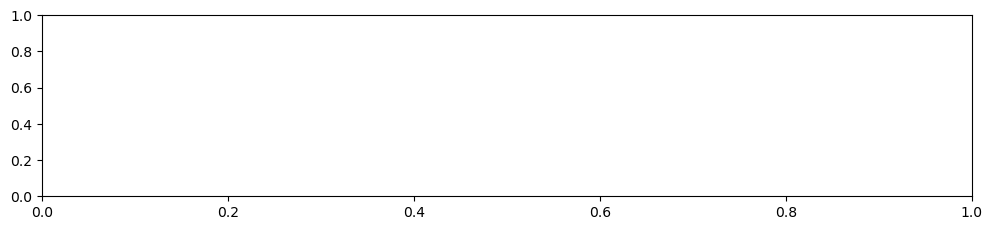

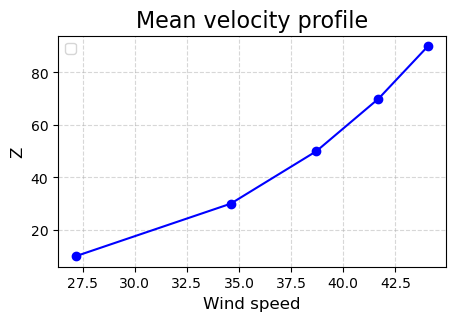

In [90]:
import numpy as py

import matplotlib.pyplot as plt
a=0
U_avg=[]
for i in Z:
    a=50*(i/160)**0.22
    U_avg.append(a)
U_avg=[round(num, 2) for num in U_avg]
U_avg= pd.DataFrame(U_avg, columns=['Uavg'])
U_avg.insert(0, 'Z', Z)
print(U_avg)

# 绘制折线图
plt.figure(figsize=(5, 3))  # 设置图形大小
plt.plot(U_avg['Uavg'], U_avg['Z'], marker='o', linestyle='-', color='blue')  # 绘制折线图

# 添加标题和标签
plt.title('Mean velocity profile', fontsize=16)
plt.xlabel('Wind speed', fontsize=12)
plt.ylabel('Z', fontsize=12)

# 添加图例
plt.legend()

# 显示网格
plt.grid(True, linestyle='--', alpha=0.5)

# 显示图形
plt.show()

#### 1.2 Turbulence intensity profile

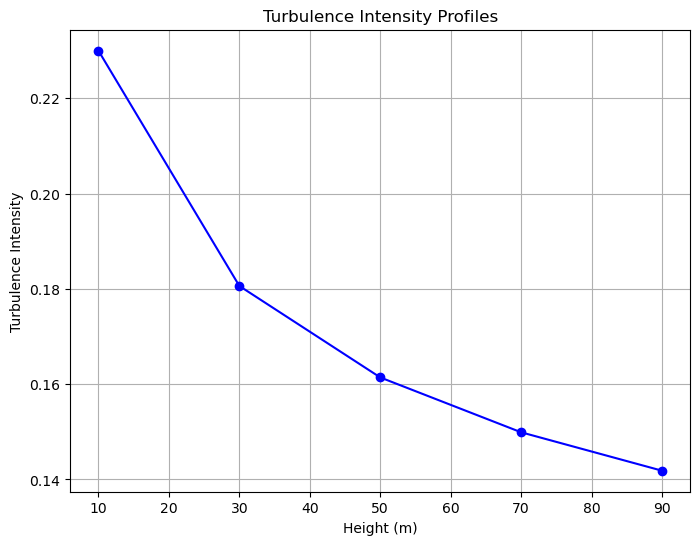

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# 定义高度和对应的湍流强度
heights = np.array([10, 30, 50, 70, 90])  # 高度 (m)
alpha = 0.22  # 湍流强度指数
I_10 = 0.23  # 高度10m处的湍流强度

# 计算每个高度处的湍流强度
I_u = I_10 * (heights / 10) ** (-alpha)

# 绘制湍流强度剖面图
plt.figure(figsize=(8, 6))
plt.plot(heights, I_u, marker='o', linestyle='-', color='b')
plt.xlabel('Height (m)')
plt.ylabel('Turbulence Intensity')
plt.title('Turbulence Intensity Profiles')
plt.grid(True)
plt.show()

#### 1.3 Wind power spectral density

C:\Users\13063\AppData\Local\Temp\ipykernel_14308\156433609.py:85: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


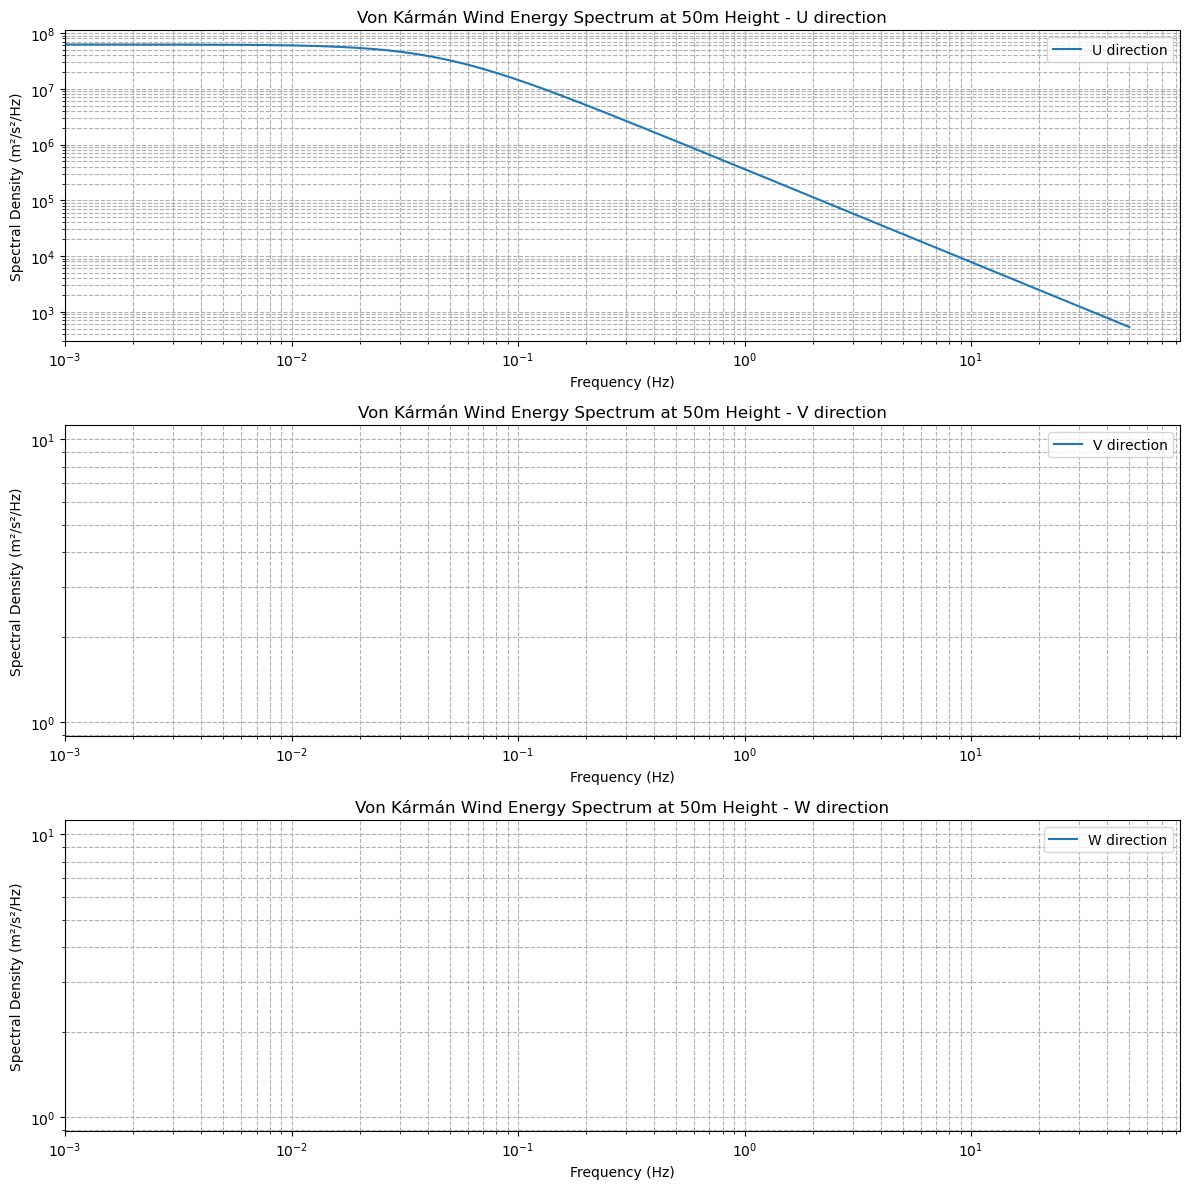

In [96]:
import numpy as np
import matplotlib.pyplot as plt

# 假设数据已经以列表的形式给出，每个方向的风速数据
# 这里使用随机数据作为示例，实际应用中应替换为真实数据
np.random.seed(0)
U_data = U1
V_data = V1
W_data = W1
# 采样时间间隔和采样频率
dt = 0.01  # 采样时间间隔 (s)
sampling_rate = 1.0 / dt  # 采样频率 (Hz)

# 计算 FFT 的函数
def compute_fft(data):
    n = len(data)
    fft_values = np.fft.fft(data - np.mean(data))  # 中心化处理
    fft_freq = np.fft.fftfreq(n, d=dt)
    return fft_values[range(n//2)], fft_freq[range(n//2)]

# 计算 Von Kármán 风能谱密度的函数
def von_karman_spectrum_u(f, L_x, U_avg, I_u):
    return (4 * I_u**2 * (L_x / U_avg)**2) / (1 + 70.8 * (f * L_x / U_avg)**2)**(5/6)

def von_karman_spectrum_v(f, L_x, U_avg, I_v):
    return (4 * I_v**2 * (L_x / U_avg) * (1 + 188.4 * (2 * f * L_x / U_avg)**2)) / (1 + 70.8 * (2 * f * L_x / U_avg)**2)**(11/6)

def von_karman_spectrum_w(f, L_x, U_avg, I_w):
    return (4 * I_w**2 * (L_x / U_avg) * (1 + 188.4 * (2 * f * L_x / U_avg)**2)) / (1 + 70.8 * (2 * f * L_x / U_avg)**2)**(11/6)

# 积分尺度 L_x 的估计（这里假设一个固定值，实际中需要根据数据估计）
L_x = 100.0  # 积分尺度 (m)

# 频率范围
f_max = sampling_rate / 2  # 奈奎斯特频率
f = np.linspace(0, f_max, int(60001 / 2))  # 频率数组

# 计算高度50m处的风能谱密度
height_index = 2  # 50m对应的索引
U = U_data
V = V_data
W = W_data
U_fft, U_f = compute_fft(U)
V_fft, V_f = compute_fft(V)
W_fft, W_f = compute_fft(W)

U_avg = np.mean(U)
V_avg = np.mean(V)
W_avg = np.mean(W)
U_int_intensity = np.mean(U**2)
V_int_intensity = np.mean(V**2)
W_int_intensity = np.mean(W**2)

S_u = von_karman_spectrum_u(U_f, L_x, U_avg, U_int_intensity)
S_v = von_karman_spectrum_v(V_f, L_x, V_avg, V_int_intensity)
S_w = von_karman_spectrum_w(W_f, L_x, W_avg, W_int_intensity)

# 绘制风能谱密度图
plt.figure(figsize=(12, 12))

plt.subplot(3, 1, 1)
plt.loglog(U_f, S_u, label='U direction')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Spectral Density (m²/s²/Hz)')
plt.title('Von Kármán Wind Energy Spectrum at 50m Height - U direction')
plt.legend()
plt.grid(True, which='both', linestyle='--')

plt.subplot(3, 1, 2)
plt.loglog(V_f, S_v, label='V direction')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Spectral Density (m²/s²/Hz)')
plt.title('Von Kármán Wind Energy Spectrum at 50m Height - V direction')
plt.legend()
plt.grid(True, which='both', linestyle='--')

plt.subplot(3, 1, 3)
plt.loglog(W_f, S_w, label='W direction')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Spectral Density (m²/s²/Hz)')
plt.title('Von Kármán Wind Energy Spectrum at 50m Height - W direction')
plt.legend()
plt.grid(True, which='both', linestyle='--')

plt.tight_layout()
plt.show()

#### 1.4 Probability density curve

C:\Users\13063\AppData\Local\Temp\ipykernel_14308\2654889841.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(U, shade=True, color="r")
C:\Users\13063\AppData\Local\Temp\ipykernel_14308\2654889841.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(V, shade=True, color="g")
C:\Users\13063\AppData\Local\Temp\ipykernel_14308\2654889841.py:34: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(W, shade=True, color="b")


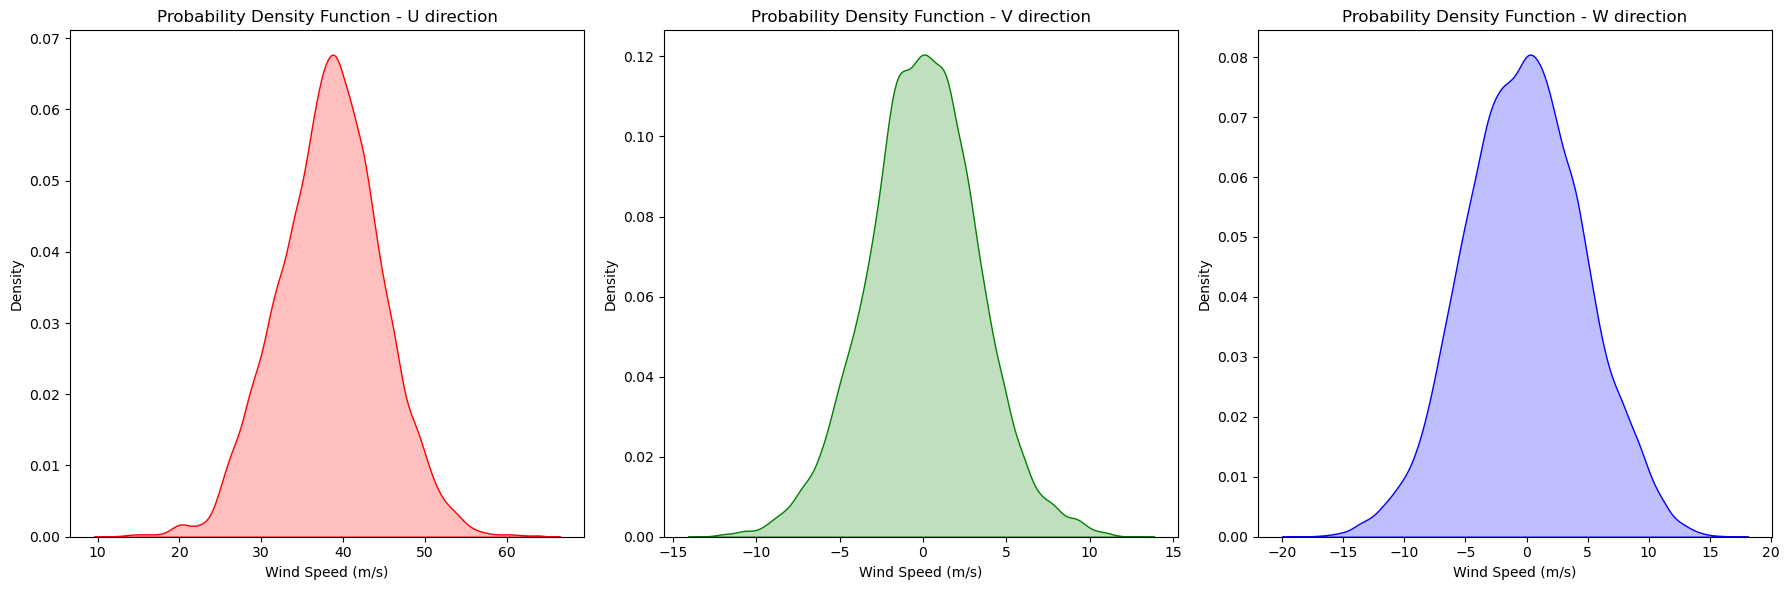

In [98]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 假设数据已经以列表的形式给出，每个方向的风速数据
# 这里使用随机数据作为示例，实际应用中应替换为真实数据
np.random.seed(0)
U_data = U1
V_data = W1
W_data = V1

# 计算高度50m处的风速数据

U = U_data
V = V_data
W = W_data

# 绘制风速数据的概率密度曲线
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.kdeplot(U, shade=True, color="r")
plt.title('Probability Density Function - U direction')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Density')

plt.subplot(1, 3, 2)
sns.kdeplot(V, shade=True, color="g")
plt.title('Probability Density Function - V direction')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Density')

plt.subplot(1, 3, 3)
sns.kdeplot(W, shade=True, color="b")
plt.title('Probability Density Function - W direction')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

### 2 Statistical results of the y-direction wind velocity time history

In [101]:
# load data
simDataPath = 'D:/windData/yDirData.mat'
simData = sio.loadmat(simDataPath, squeeze_me=True, struct_as_record=False)
U = simData['U']
V = simData['V']
W = simData['W']
X = simData['X']
Y = simData['Y']
Z = simData['Z']
dt = simData['dt']
del simData

#### 2.1 Spatial correlation coefficient in y direction

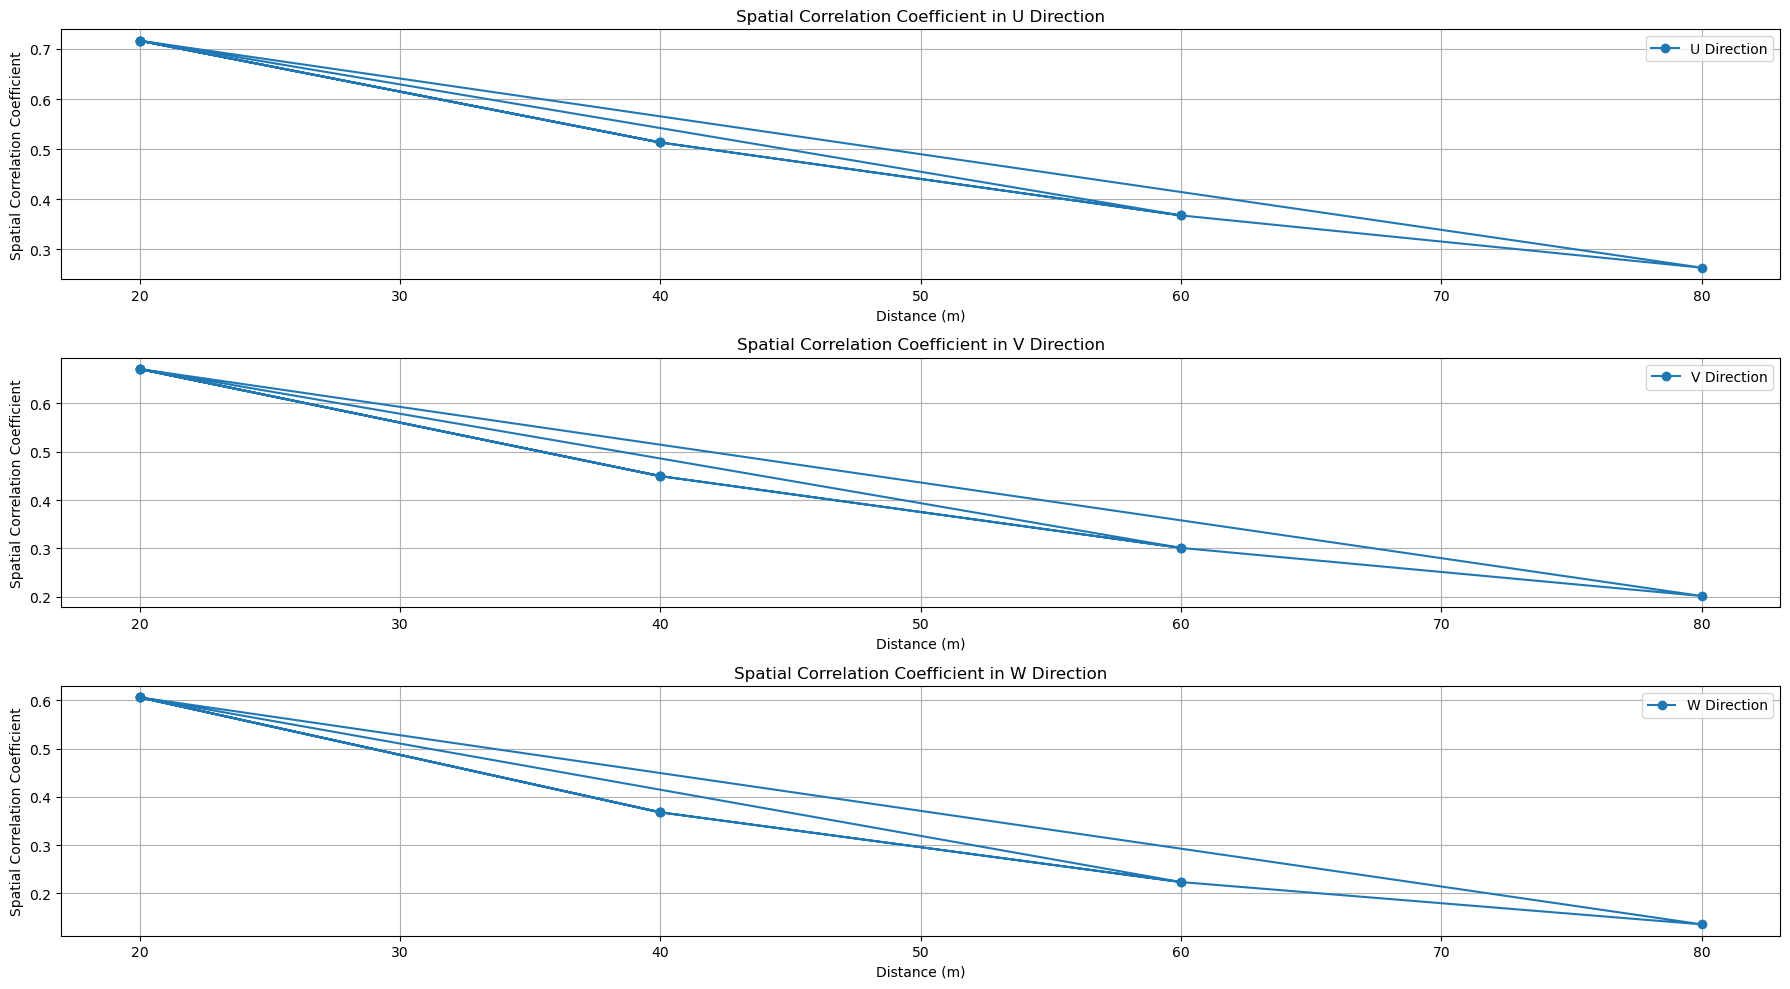

In [104]:

import scipy.io as sio
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 给定点的坐标
points = [
    (0, 0, 50),
    (0, 20, 50),
    (0, 40, 50),
    (0, 60, 50),
    (0, 80, 50)
]

# 给定的空间积分尺度
Ly_u = 60  # U方向的空间积分尺度 (m)
Ly_v = 50  # V方向的空间积分尺度 (m)
Ly_w = 40  # W方向的空间积分尺度 (m)

# 假设已经有每个点的三向风速数据，这里用随机数据模拟
# 实际应用中，您需要将您的风速数据替换这里的随机数据
#np.random.seed(42)
num_samples = 60001

# 计算空间相关系数
def calculate_spatial_correlation(r, Ly):
    return np.exp(-np.abs(r) / Ly)

# 计算每对点之间的空间距离r和相关系数
distances = []
correlation_u = []
correlation_v = []
correlation_w = []

for i in range(len(points)):
    for j in range(i + 1, len(points)):
        # 计算y方向的距离
        r = points[j][1] - points[i][1]
        distances.append(r)
        
        # 计算相关系数
        rho_u = calculate_spatial_correlation(r, Ly_u)
        rho_v = calculate_spatial_correlation(r, Ly_v)
        rho_w = calculate_spatial_correlation(r, Ly_w)
        
        correlation_u.append(rho_u)
        correlation_v.append(rho_v)
        correlation_w.append(rho_w)

# 绘图
plt.figure(figsize=(18, 10))

# U方向
plt.subplot(3, 1, 1)
plt.plot(distances, correlation_u, 'o-', label='U Direction')
plt.xlabel('Distance (m)')
plt.ylabel('Spatial Correlation Coefficient')
plt.title('Spatial Correlation Coefficient in U Direction')
plt.legend()
plt.grid(True)

# V方向
plt.subplot(3, 1, 2)
plt.plot(distances, correlation_v, 'o-', label='V Direction')
plt.xlabel('Distance (m)')
plt.ylabel('Spatial Correlation Coefficient')
plt.title('Spatial Correlation Coefficient in V Direction')
plt.legend()
plt.grid(True)

# W方向
plt.subplot(3, 1, 3)
plt.plot(distances, correlation_w, 'o-', label='W Direction')
plt.xlabel('Distance (m)')
plt.ylabel('Spatial Correlation Coefficient')
plt.title('Spatial Correlation Coefficient in W Direction')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
%matplotlib inline